### Normalization


In [2]:
import numpy as np
from sklearn import preprocessing

In [3]:
feature = np.array([[-500.5],
                    [-100.1],
                    [0],
                    [100.1],
                    [900.9]])

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_feature = minmax_scale.fit_transform(feature)
scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

In [4]:
feature1 = np.array([[1],
                    [5],
                    [10],
                    [6],
                    [100]])
scaled_feature1 = preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(feature1)
scaled_feature1

array([[0.        ],
       [0.04040404],
       [0.09090909],
       [0.05050505],
       [1.        ]])

### Standardization

In [5]:
x = np.array([[-1000.1],
              [-200.2],
              [500.5],
              [600.6],
              [9000.9]])
scaler = preprocessing.StandardScaler()
standardized = scaler.fit_transform(x)

standardized

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

### Outliers

detect using <br>
1. IQR <br>
2. Visualization techniques

In [9]:
import pandas as pd
df = pd.read_csv("file.csv", usecols = ["LotArea","SalePrice"])
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
missing = df.isnull().sum().to_dict()
df_shape = df.shape[0]
for k, v in missing.items():
    if v > 0:
        print(f"{k} : Missing Percentage : {round((v/df_shape)*100)}%")

LotFrontage : Missing Percentage : 18%
Alley : Missing Percentage : 94%
MasVnrType : Missing Percentage : 60%
MasVnrArea : Missing Percentage : 1%
BsmtQual : Missing Percentage : 3%
BsmtCond : Missing Percentage : 3%
BsmtExposure : Missing Percentage : 3%
BsmtFinType1 : Missing Percentage : 3%
BsmtFinType2 : Missing Percentage : 3%
Electrical : Missing Percentage : 0%
FireplaceQu : Missing Percentage : 47%
GarageType : Missing Percentage : 6%
GarageYrBlt : Missing Percentage : 6%
GarageFinish : Missing Percentage : 6%
GarageQual : Missing Percentage : 6%
GarageCond : Missing Percentage : 6%
PoolQC : Missing Percentage : 100%
Fence : Missing Percentage : 81%
MiscFeature : Missing Percentage : 96%


#### 1. using IQR

In [12]:
q1 = df["SalePrice"].quantile(0.25)
q3 = df["SalePrice"].quantile(0.75)

IQR = q3 - q1
print(f"q1 : {q1}")
print(f"q3 : {q3}")
print(f"IQR : {IQR}")

q1 : 129975.0
q3 : 214000.0
IQR : 84025.0


In [13]:
lower_whisker = q1 - (1.5 * IQR)
upper_whisker = q3 + (1.5 * IQR)
print(f"lower whisker : {lower_whisker}")
print(f"upper whisker : {upper_whisker}")

lower whisker : 3937.5
upper whisker : 340037.5


In [14]:
print((df["SalePrice"]<lower_whisker) | (df["SalePrice"]>upper_whisker))

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool


**New dataframe keeping the non-outliers based on the whiskers.**

In [17]:
df = df[["LotArea","SalePrice"]]

In [18]:
new_df = df[(df["SalePrice"]>lower_whisker) & (df["SalePrice"]<upper_whisker)]
new_df.shape

(1399, 2)

In [19]:
new_q1 = df.quantile(0.25)
new_q3 = df.quantile(0.75)

new_IQR = new_q3 - new_q1
print(f"q1 : {new_q1}")
print(f"q3 : {new_q3}")
print(f"IQR : {new_IQR}")

q1 : LotArea        7553.5
SalePrice    129975.0
Name: 0.25, dtype: float64
q3 : LotArea       11601.5
SalePrice    214000.0
Name: 0.75, dtype: float64
IQR : LotArea       4048.0
SalePrice    84025.0
dtype: float64


In [99]:
nlower_whisker = new_q1 - (1.5 * new_IQR)
nupper_whisker = new_q3 + (1.5 * new_IQR)
print(f"lower whisker : {nlower_whisker}")
print(f"upper whisker : {nupper_whisker}")

lower whisker : LotArea      1481.5
SalePrice    3937.5
dtype: float64
upper whisker : LotArea       17673.5
SalePrice    340037.5
dtype: float64


In [100]:
nnew_df = df[(df>nlower_whisker) & (df<nupper_whisker)]
nnew_df.shape

(1460, 2)

In [20]:
df.shape

(1460, 2)

**Using Visualization technique**
outlier detection

{'whiskers': [<matplotlib.lines.Line2D at 0x7f02f163e780>,
 'caps': [<matplotlib.lines.Line2D at 0x7f02f163ed20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f02f17abcb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f02f163f320>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f02f163f620>],
 'means': []}

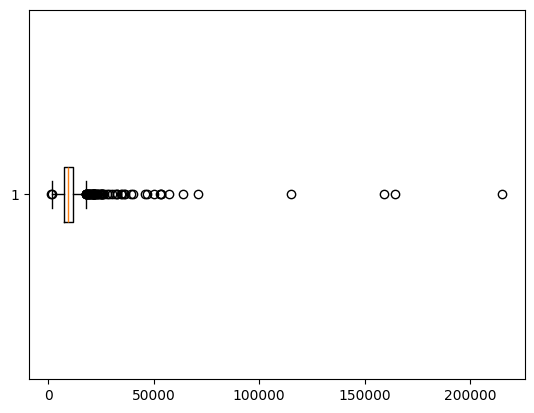

In [21]:
import matplotlib.pyplot as plt
plt.boxplot(df["LotArea"], vert = False)

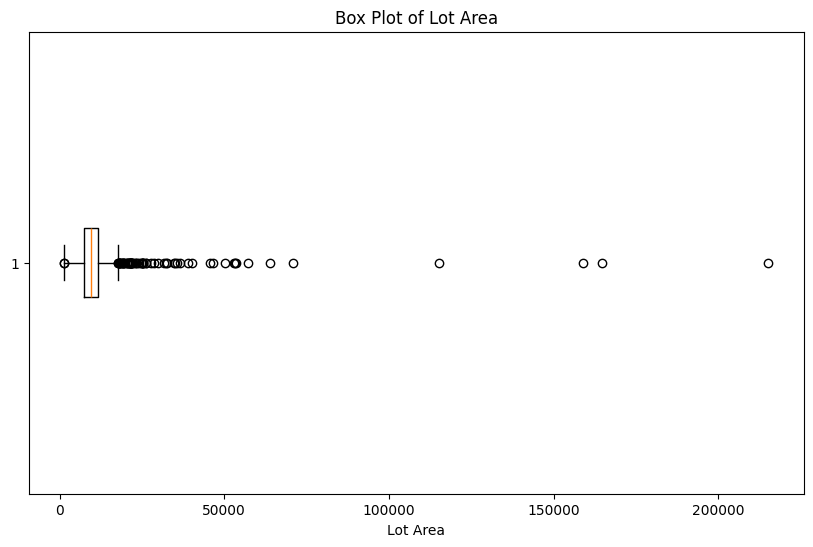

In [22]:
plt.figure(figsize=(10, 6))
plt.boxplot(df["LotArea"], vert=False)
plt.xlabel("Lot Area")
plt.title("Box Plot of Lot Area")
plt.show()

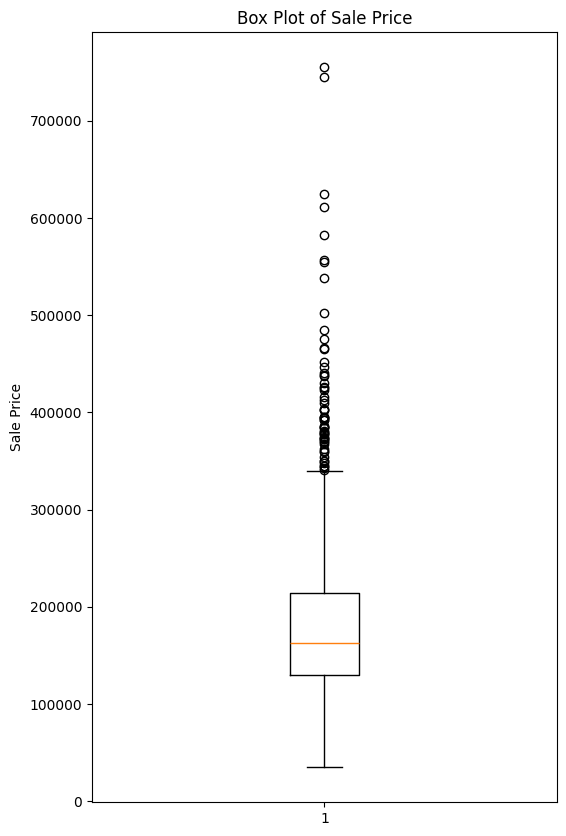

In [23]:
plt.figure(figsize=(6, 10))
plt.boxplot(df["SalePrice"], vert=True)
plt.ylabel("Sale Price")
plt.title("Box Plot of Sale Price")
plt.show()

#### Histogram showing the skewness and outlier possibility

<Axes: >

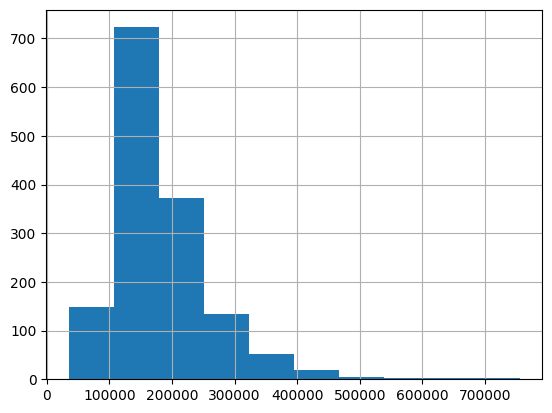

In [24]:
df.SalePrice.hist()

### Scatter plot : 

- show the relationship between the `Lot area` and `Sales Price`

Text(0, 0.5, 'Sales Price')

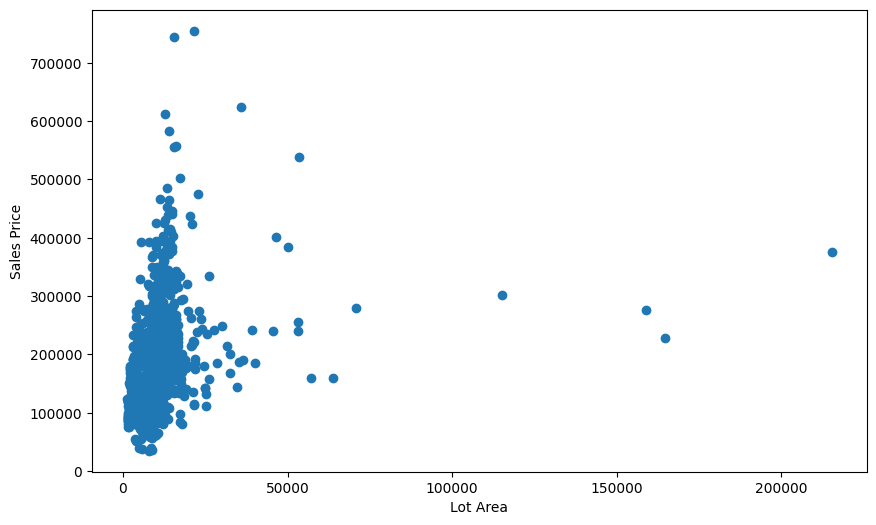

In [25]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df["LotArea"],df["SalePrice"])
ax.set_xlabel("Lot Area")
ax.set_ylabel("Sales Price")

**Quantile based Flooring and Capping**

- flooring ( bottom 1%) for thel= lower values and 
- capping (99% percentile ) for the higher values


In [26]:
floor = (df["SalePrice"].quantile(0.01))
cap = (df["SalePrice"].quantile(0.99))
print(f"Floor : {floor}")
print(f"Cap : {cap}")

Floor : 61815.97
Cap : 442567.01000000053


In [27]:
df1 = df.copy()
df1["SalePrice"] = np.where(df1["SalePrice"] < floor, floor, df1["SalePrice"])
df1["SalePrice"] = np.where(df1["SalePrice"] > cap, cap, df1["SalePrice"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f02f143f440>,
 'caps': [<matplotlib.lines.Line2D at 0x7f02f143f980>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f02f143f230>],
 'medians': [<matplotlib.lines.Line2D at 0x7f02f143fec0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f02f1278140>],
 'means': []}

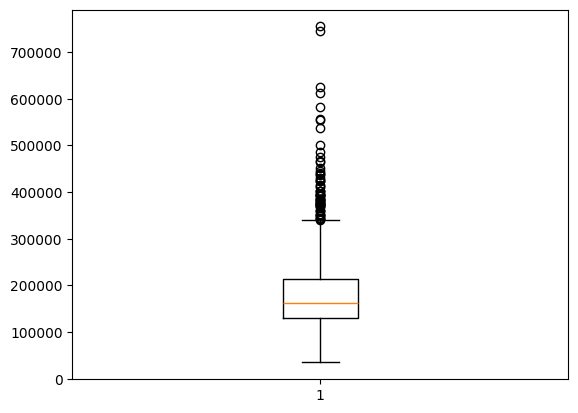

In [28]:
plt.boxplot(df["SalePrice"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f02f12c2f60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f02f12c34d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f02f12c2cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f02f1279250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f02f140bc80>],
 'means': []}

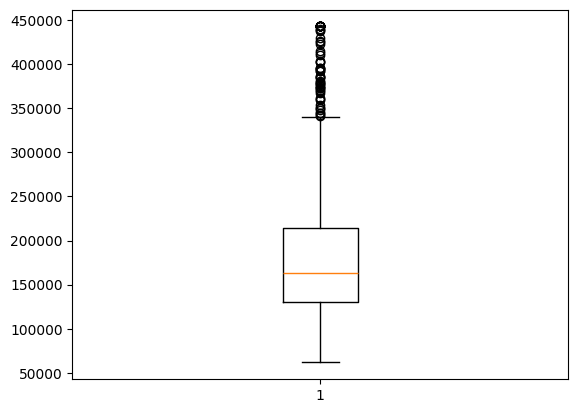

In [29]:
plt.boxplot(df1["SalePrice"])

In [30]:
# use 10% and 90% for flooring and caping
floor = (df["SalePrice"].quantile(0.10))
cap = (df["SalePrice"].quantile(0.90))
print(f"Floor : {floor}")
print(f"Cap : {cap}")

Floor : 106475.0
Cap : 278000.0


In [31]:
df1 = df.copy()
df1["SalePrice"] = np.where(df1["SalePrice"] < floor, floor, df1["SalePrice"])
df1["SalePrice"] = np.where(df1["SalePrice"] > cap, cap, df1["SalePrice"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f02f13321b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f02f1332750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f02f1331ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f02f1332cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f02f1332ed0>],
 'means': []}

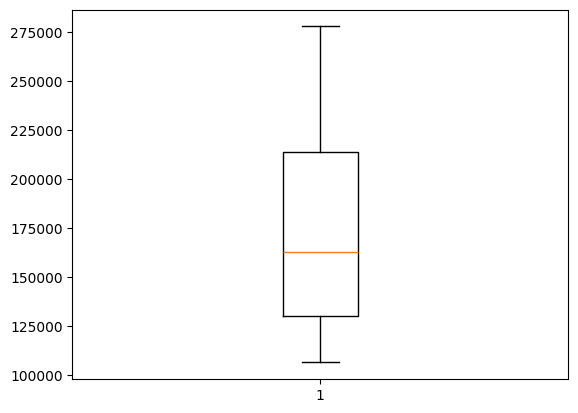

In [32]:
plt.boxplot(df1["SalePrice"])

**Trimming**

In [33]:
df2 = df.copy()
print(f"Number of records in the table: {df2.shape}")

Number of records in the table: (1460, 2)


In [34]:
# outliers
index = df2[(df2["SalePrice"] > upper_whisker) | (df2["SalePrice"] < lower_whisker)].index
index.shape

(61,)

In [35]:
# removing outliers
df2.drop(index, inplace = True)
df2.shape

(1399, 2)

### Log Transformation

In [36]:
print(df["SalePrice"].skew().round(2))

1.88


In [37]:
df["log_sale"] = df["SalePrice"].map(lambda i : np.log(i) if i>0 else 0)
print(df["log_sale"].skew().round(2))

0.12


/tmp/ipykernel_35042/1858511418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_sale"] = df["SalePrice"].map(lambda i : np.log(i) if i>0 else 0)


<Axes: >

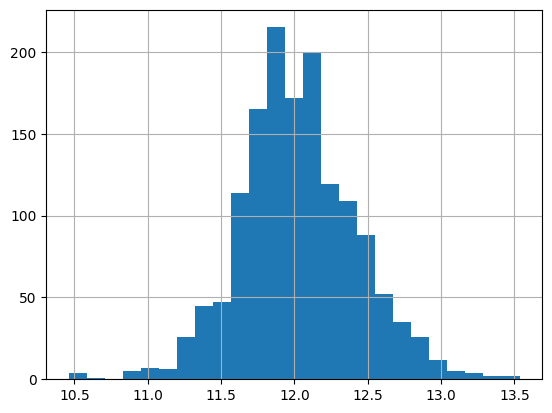

In [38]:
df["log_sale"].hist(bins = 25)

### Discretization

In [1]:
from sklearn.preprocessing import Binarizer

In [2]:
age = np.array([[6],
                [12],
                [18],
                [20],
                [36],
                [65]
                ])
binarizer = Binarizer(threshold=18)

NameError: name 'np' is not defined

In [41]:
binarizer.fit_transform(age)

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1]])

numPy's Digitize

In [42]:
np.digitize(age, bins = [20,30,64])

array([[0],
       [0],
       [0],
       [1],
       [2],
       [3]])